In [1]:
from datetime import datetime

In [2]:
datetime(year=2016,month=7,day=4)

datetime.datetime(2016, 7, 4, 0, 0)

In [5]:
from dateutil import parser
date = parser.parse('4th of July,2016')
date

datetime.datetime(2016, 7, 4, 0, 0)

In [6]:
date.strftime('%A')

'Monday'

In [7]:
import numpy as np
date = np.array('2016-08-09',dtype=np.datetime64)

In [8]:
date

array(datetime.date(2016, 8, 9), dtype='datetime64[D]')

In [9]:
date + np.arange(12)

array(['2016-08-09', '2016-08-10', '2016-08-11', '2016-08-12',
       '2016-08-13', '2016-08-14', '2016-08-15', '2016-08-16',
       '2016-08-17', '2016-08-18', '2016-08-19', '2016-08-20'], dtype='datetime64[D]')

In [10]:
import pandas as pd

In [11]:
date = pd.to_datetime('4th of July,2016')

In [12]:
date

Timestamp('2016-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Monday'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions


In [15]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0,probability=True)
elcf = EnsembleVoteClassifier(clfs=[clf1,clf2,clf3],
                             weights=[2,1,1],voting='soft')


In [16]:
# Load some example data
X,y = iris_data()
X = X[:,[0,2]]

# Ploting Descion Regison
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,9))
labels = ['LR','RF','RBF','EM']



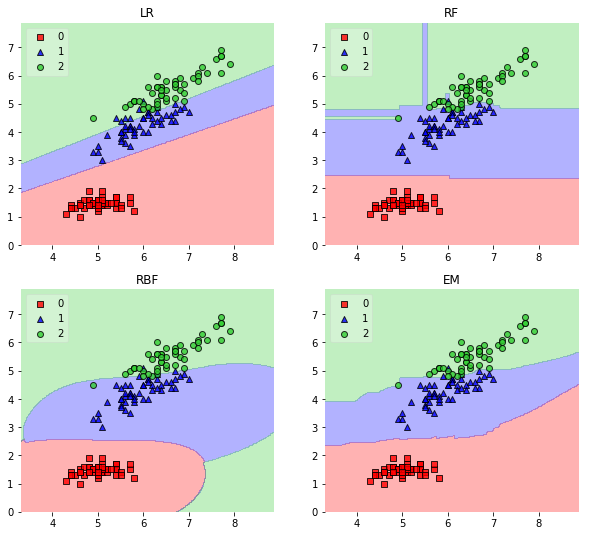

In [20]:
for clf,lab,grd in zip([clf1,clf2,clf3,elcf],
                      labels,
                      itertools.product((0,1),repeat=2)):
    clf.fit(X,y)
    ax = plt.subplot(gs[grd[0],grd[1]])
    fig = plot_decision_regions(X = X, y=y,clf=clf,legend=2)
    plt.title(lab)
plt.show()

In [22]:
rng = np.random.RandomState(42)
X = rng.rand(1000000)
Y = rng.rand(1000000)
%timeit X+Y

2.29 ms ± 63.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
import pandas as pd
nrows,ncols = 1000000,100
rng = np.random.RandomState(42)
df1,df2,df3,df4 = (pd.DataFrame(rng.rand(nrows,ncols))
                  for i in range(4))


In [24]:
%timeit df1+df2+df3+df4

1.25 s ± 413 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit pd.eval('df1+df2+df3+df4')

444 ms ± 22.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
df1,df2,df3,df4,df5 = (pd.DataFrame(rng.randint(0,1000,(100,3))) 
                      for i in range(5))

In [27]:
result1 = -df1 *df2/(df3+df4) -df5
result2 = pd.eval('-df1 *df2/(df3+df4) -df5')
np.allclose(result1,result2)

True

In [28]:

df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.350317,0.229595,0.083845
1,0.328702,0.063538,0.083904
2,0.856127,0.340678,0.478523
3,0.808805,0.668873,0.830758
4,0.160789,0.025621,0.595533


In [29]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True